In [156]:
import pandas as pd
from collections import Counter
import numpy as np
import os

In [163]:
RESULTS_FOLDERS = ['0MS_LATENCY_RESULTS', '05MS_LATENCY_RESULTS', '5MS_LATENCY_RESULTS', '25MS_LATENCY_RESULTS',
                   '50MS_LATENCY_RESULTS', '100MS_LATENCY_RESULTS', '200MS_LATENCY_RESULTS']

RESULTS_FOLDER = RESULTS_FOLDERS[6]

In [164]:
FILES = []
for file in os.listdir(RESULTS_FOLDER):
    print(file)
    FILES.append(file)

mnist250_3c_640s_1566817870.csv
mnist250_7c_640s_1566818101.csv
mnist250_8c_640s_1566818199.csv
mnist250_4c_640s_1566817910.csv
mnist250_5c_640s_1566817959.csv
mnist250_10c_640s_1566818542.csv
mnist250_9c_640s_1566818343.csv
mnist250_2c_640s_1566817833.csv
mnist250_6c_640s_1566818021.csv


In [165]:
LABELED_RESULTS = []
UNLABELED_RESULTS = []

for f in FILES:
    
    print(f)
    df = pd.read_csv(os.path.join(RESULTS_FOLDER, f))
    
    # Percentage of unlabeled samples
    #unlabeled_ratio = df.groupby('Label')['Sample ID'].nunique()[-1] / len(df)
    #print(unlabeled_ratio)
    
    # Mean time elapsed per unlabeled data samples
    unlabeled_mean = df.groupby('Label')['Time elapsed'].mean()[-1]
    UNLABELED_RESULTS.append(unlabeled_mean)
    print(unlabeled_mean)
    
    # Mean time elapsed per labeled data samples
    labeled_mean = np.mean( list( set(list(df.groupby('Label')['Time elapsed'].mean())) - set([unlabeled_mean]) ) )
    LABELED_RESULTS.append(labeled_mean)
    print(labeled_mean)
    
    print('------------------')

mnist250_3c_640s_1566817870.csv
0.03904051158078917
0.09338163561621622
------------------
mnist250_7c_640s_1566818101.csv
0.10247086945433205
0.22224090700761934
------------------
mnist250_8c_640s_1566818199.csv
0.15758896477614778
0.3225373891679752
------------------
mnist250_4c_640s_1566817910.csv
0.049759749985911365
0.11242149973433037
------------------
mnist250_5c_640s_1566817959.csv
0.060294808660234726
0.13551202832873993
------------------
mnist250_10c_640s_1566818542.csv
0.3324032912075316
0.6830597096553324
------------------
mnist250_9c_640s_1566818343.csv
0.216154067203252
0.4281731831847872
------------------
mnist250_2c_640s_1566817833.csv
0.03496894894576654
0.08483571941013736
------------------
mnist250_6c_640s_1566818021.csv
0.08052012950751432
0.18371533885244049
------------------


In [168]:
LABELED_RESULTS = sorted(LABELED_RESULTS)
UNLABELED_RESULTS = sorted(UNLABELED_RESULTS)

print(LABELED_RESULTS)
print(UNLABELED_RESULTS)

[0.08483571941013736, 0.09338163561621622, 0.11242149973433037, 0.13551202832873993, 0.18371533885244049, 0.22224090700761934, 0.3225373891679752, 0.4281731831847872, 0.6830597096553324]
[0.03496894894576654, 0.03904051158078917, 0.049759749985911365, 0.060294808660234726, 0.08052012950751432, 0.10247086945433205, 0.15758896477614778, 0.216154067203252, 0.3324032912075316]


In [167]:
# Summary results (labeled)
L_0 = [0.05327391600536251, 0.059776248113604345, 0.07498836058613395, 0.08419884912993764, 0.11281462267327294, 0.13278451682741332, 0.2812577139204032, 0.3838051672609066, 0.630861246247114]
L_05 = [0.053072257682212284, 0.05969336642195801, 0.07673287397034129, 0.08512619745859955, 0.11034926997638576, 0.13365216904205965, 0.2795443728710032, 0.3902468926886838, 0.6268709020802055]
L_5 = [0.0570171077159205, 0.06477492126112698, 0.0841076974822905, 0.09307648862295909, 0.12038963258736207, 0.14252806186869194, 0.2979964917805073, 0.4123542950377921, 0.6384503467354801]
L_25 = [0.058525652164735646, 0.06639834546064224, 0.08644665474359309, 0.09706586084840335, 0.12658107143442268, 0.15407243112402796, 0.3093516469046962, 0.4074708614155767, 0.655767792010913]
L_50 = [0.0665749642329355, 0.07105604282067272, 0.09184184824639509, 0.10148602595412491, 0.13428193557085583, 0.1653775772702327, 0.3004383901620941, 0.42101882778928706, 0.6456530300883414]
L_100 = [0.07383622733297401, 0.07934330949364732, 0.10529309540323636, 0.11936645195820726, 0.15326809314445022, 0.18636845057313908, 0.3044701933939372, 0.41940408105671767, 0.6700964192507937]
L_200 = [0.08483571941013736, 0.09338163561621622, 0.11242149973433037, 0.13551202832873993, 0.18371533885244049, 0.22224090700761934, 0.3225373891679752, 0.4281731831847872, 0.6830597096553324]

# Summary results (unlabeled)
UL_0 = [0.02504944350065117, 0.027439037703241183, 0.03665830235962474, 0.04189220578724165, 0.05191353330873463, 0.06636824216998992, 0.14476509094238282, 0.2056310987472534, 0.3191975347650876]
UL_05 = [0.02610885742867347, 0.027609659063405005, 0.03560960654056433, 0.040313254168004166, 0.05567617447960456, 0.06588322452352016, 0.1447606370000556, 0.19797410400485696, 0.3298762017174771]
UL_5 = [0.02719847729176651, 0.03135762567305488, 0.04051502520283952, 0.045137089298617455, 0.060199557980404626, 0.07068765276954288, 0.14626116568681394, 0.20193034464174564, 0.332852812329675]
UL_25 = [0.028308908144632976, 0.032722233971462976, 0.041242142204982624, 0.04500485791100396, 0.057161996853096406, 0.07236098610194383, 0.14739824970316442, 0.2081977728825466, 0.33482494894063697]
UL_50 = [0.029141559439190362, 0.03643022740006051, 0.04209823842428945, 0.04810223470326343, 0.06156052763645466, 0.07855693767407189, 0.15279074550076366, 0.20196922875677276, 0.33033526249420947]
UL_100 = [0.030311661630772466, 0.03554643326551207, 0.047409827604233845, 0.05591775763849294, 0.07389084315690837, 0.08828370190836901, 0.14716924587113958, 0.2067696493725444, 0.3331594831624608]
UL_200 = []

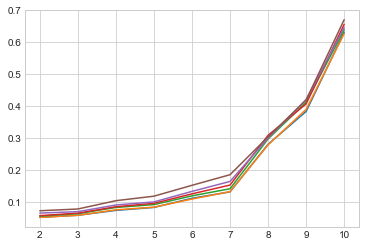

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = list(range(2,11))

ax.plot(x, L_0)
ax.plot(x, L_05)
ax.plot(x, L_5)
ax.plot(x, L_25)
ax.plot(x, L_50)
ax.plot(x, L_100)
#ax.plot(x, L_200)